In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
df_list = []
for file in glob.glob("./*.csv"):
    df_list.append(pd.read_csv(file))
df = pd.concat(df_list)


In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 23313


In [4]:
df.sample(5)

,issuekey,title,description,storypoint,split_mark
2722,DM-4431,setup mechanism to measure the query response ...,Setup the method to measure the response time ...,30,train
616,TISTUD-1870,Content assist for $. in JS files,As an example: {code} <Window> <Button ...,8,train
773,TIMOB-17925,iOS: Upgrade titanium_profiler source code to ...,Upgrading this to 64-bit: https://github.com/a...,13,train
277,TESB-3854,Route Builder marks cSetHeader or cProcessor c...,If a cSetHeader or cProcessor component is con...,1,train
636,MULE-8303,ClassCastException when setting a MEL expressi...,When a MEL expression is set in the config-ref...,5,val


In [5]:
df.rename(columns={"issuekey": "id", "storypoint": "label"}, inplace=True)

### Clean the data:

In [6]:
print("Number of missing titles:", df["title"].isnull().sum())
print("Number of missing descriptions:", df["description"].isnull().sum())

Number of missing titles: 0
Number of missing descriptions: 2231


In [7]:
df.loc[df["description"].isnull(), "description"] = ""

In [8]:
print("Number of missing labels:", df["label"].isnull().sum())

Number of missing labels: 0


In [9]:
print(f"Number of duplicated titles and descriptions: {df[["title", "description"]].duplicated().sum()} ({df[["title", "description"]].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated titles and descriptions: 168 (0.72%)


### Analyze distributions:

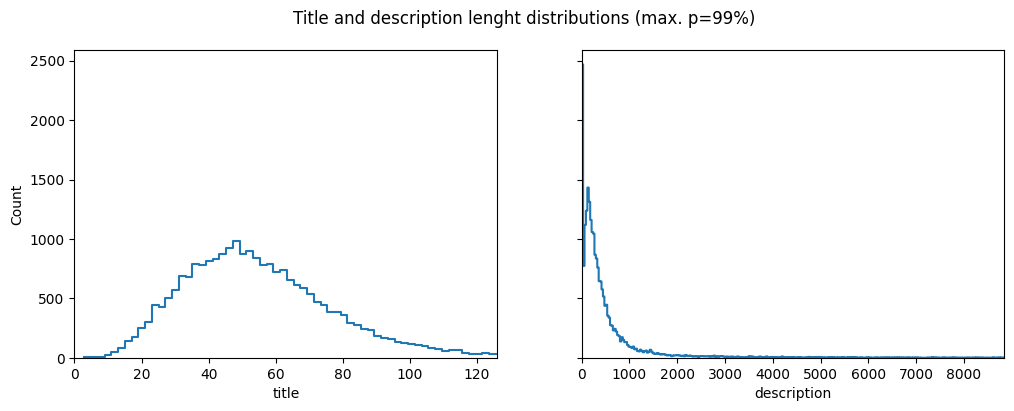

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.histplot(df["title"].str.len(), element="step", fill=False, ax=axes[0])
axes[0].set_xlim([0, df["title"].str.len().quantile(.99)])
sns.histplot(df["description"].str.len(), element="step", fill=False, ax=axes[1])
axes[1].set_xlim([0, df["description"].str.len().quantile(.99)])
plt.suptitle("Title and description lenght distributions (max. p=99%)")
plt.show()

In [11]:
df["label"].nunique()

80

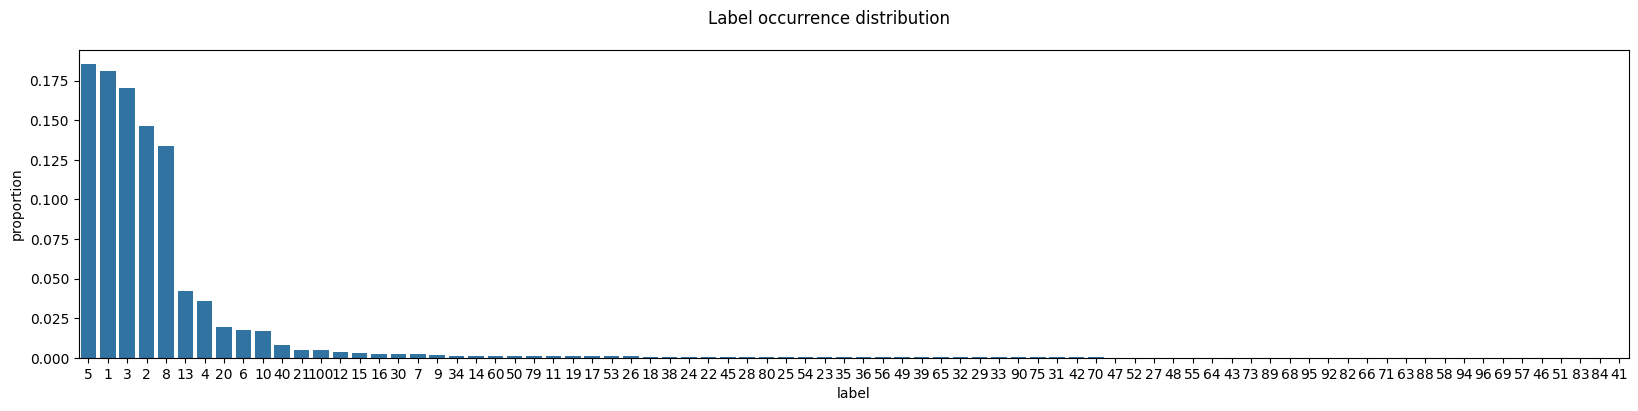

In [12]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(df["label"].astype(str).value_counts(dropna=False, normalize=True), ax=ax)
plt.suptitle("Label occurrence distribution")
plt.show()

### Persist datasets:

In [13]:
def concat(x):
    text = ""
    if x["title"] != "":
        text = x["title"]
    if x["description"] != "":
        if text != "":
            text += ".\n"
        text += x["description"]
    return text

df["text"] = df.apply(concat, axis=1)

In [14]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 168 (0.72%)


In [15]:
df[["id", "text", "label"]].to_parquet("./story_points.parquet", index=False)

In [16]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 23313
